# Movies Dataset

This dataset can be found on Kaggle.com. The analysis has been carried out by elisabeth-sh.

# Importing the main libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv("movies.csv")
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

# Data Cleaning

In [3]:
df.shape

(7668, 15)

At the moment, there are 15 columns and 7668 rows in the dataset.

In [4]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

There are about 2300 missing values across different columns. The "budget" column has the majority of null values. To overhaul this without deleting half of the dataset, the mean value will be used.

In [5]:
df["budget"] = df["budget"].fillna(int(df["budget"].mean()))

In [6]:
df = df.dropna(axis = 0)
df.isnull().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [7]:
df.shape

(7412, 15)

After the cleaning, the dataset has no null values. It comprises 15 columns and 7412 rows.

# Research Questions

1) Are there any correlations in the dataset?
2) What year has the highest number of releases?
3) What are the most and the least profitable movies? What budget do they have?
4) What are the top 10 most popular movies?
5) What actors have the highest number of appearances?
6) What directors have the highest number of productions?
7) How have user preferences changed over the years?
8) How has runtime changed over the years?
9) What is the shortest movie? What is the longest movie? How long do they last?
10) What are the top ten companies with the highest number of releases?

# Data analysis

##### 1) Are there any correlations in the dataset?

<Axes: >

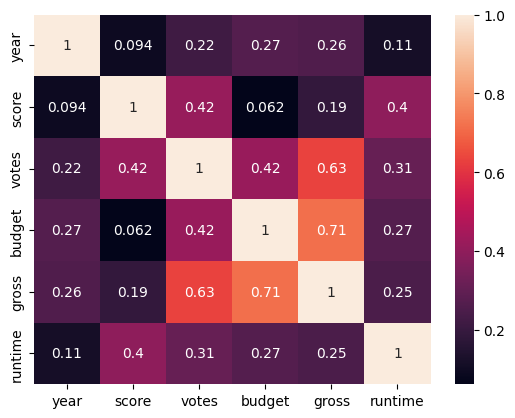

In [8]:
co = df.select_dtypes("number").corr()
sns.heatmap(co, annot = True)

The graph above shows that there are strong positive correlations between:
- gross revenue and budget,
- gross revenue and reviews,

Also, there are moderate positive correlations between:
- budget and reviews,
- score and runtime,
- score and reviews.  

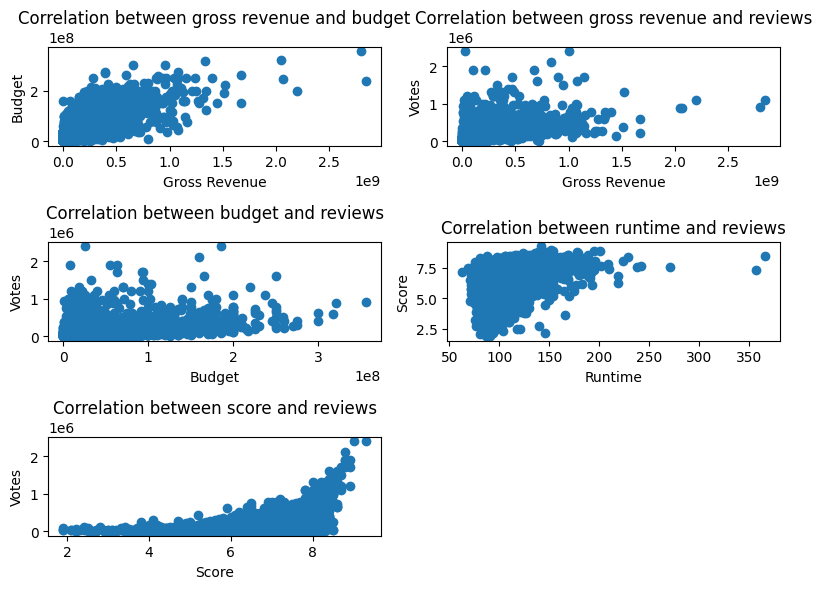

In [9]:
fig, axs = plt.subplots(3, 2, figsize = (8, 6))
# Plotting of the first subplot
axs[0, 0].scatter(x = df["gross"], y = df["budget"])
axs[0, 0].set_xlabel('Gross Revenue')
axs[0, 0].set_ylabel('Budget')
axs[0, 0].set_title("Correlation between gross revenue and budget")
# To plot on the second subplot
axs[0, 1].scatter(x = df["gross"], y = df["votes"])
axs[0, 1].set_xlabel('Gross Revenue')
axs[0, 1].set_ylabel('Votes')
axs[0, 1].set_title("Correlation between gross revenue and reviews")
# Plotting of the third subplot
axs[1, 0].scatter(x = df["budget"], y = df["votes"])
axs[1, 0].set_xlabel('Budget')
axs[1, 0].set_ylabel('Votes')
axs[1, 0].set_title("Correlation between budget and reviews")
# Plotting of the fourth subplot
axs[1, 1].scatter(x = df["runtime"], y = df["score"])
axs[1, 1].set_xlabel('Runtime')
axs[1, 1].set_ylabel('Score')
axs[1, 1].set_title("Correlation between runtime and reviews")
# Plotting of the last subplot
axs[2, 0].scatter(x = df["score"], y = df["votes"])
axs[2, 0].set_xlabel('Score')
axs[2, 0].set_ylabel('Votes')
axs[2, 0].set_title("Correlation between score and reviews")
fig.delaxes(axs[2, 1])
plt.tight_layout()
# Displaying all plots
plt.show()

##### 2) What year has the highest number of releases?

In [10]:
sum = 0
for i in df["year"].value_counts():
    if i == df["year"].value_counts().max():
        sum += 1
print(sum)

5


In [11]:
df.loc[df["year"].value_counts().index[:5]]

name     rating      genre  year  \
year                                                         
2009                Body Parts          R     Horror  1991   
2002       Guilty by Suspicion      PG-13      Drama  1991   
2014  All I Want for Christmas          G     Comedy  1991   
2013     The Efficiency Expert         PG     Comedy  1991   
2005  Tous les matins du monde  Not Rated  Biography  1991   

                              released  score   votes          director  \
year                                                                      
2009    August 2, 1991 (United States)    5.6  4100.0          Eric Red   
2002    March 15, 1991 (United States)    6.5  8000.0     Irwin Winkler   
2014  November 8, 1991 (United States)    6.0  4600.0  Robert Lieberman   
2013  November 6, 1992 (United States)    6.2  1700.0        Mark Joffe   
2005        December 18, 1991 (France)    7.5  6800.0     Alain Corneau   

               writer               star        country      budget  \
year                                                                  
2009   Pierre Boileau         Jeff Fahey  United States  10000000.0   
2002    Irwin Winkler     Robert De Niro  United States  35589876.0   
2014   Thom Eberhardt  Harley Jane Kozak  United States  35589876.0   
2013         Max Dann    Anthony Hopkins      Australia  35589876.0   
2005  Pascal Quignard   Gérard Depardieu         France  35589876.0   

           gross                                     company  runtime  
year                                                                   
2009   9188150.0                          Paramount Pictures     88.0  
2002   9480198.0                                Warner Bros.    105.0  
2014  14812144.0                          Paramount Pictures     92.0  
2013    179469.0  Australian Film Finance Corporation (AFFC)     85.0  
2005   3089497.0                               Film Par Film    115.0

The highest number of releases is 200. Such years as 2009, 2002, 2014, 2013 and 2005 share this result.

##### 3) What are the most and the least profitable movies? What budget do they have?

In [12]:
df["profit"] = df["gross"] - df["budget"]
max = df["profit"].max()
min = df["profit"].min()
avatar = df.loc[df["profit"] == max]
irishman = df.loc[df["profit"] == min]
films = pd.concat([avatar, irishman])

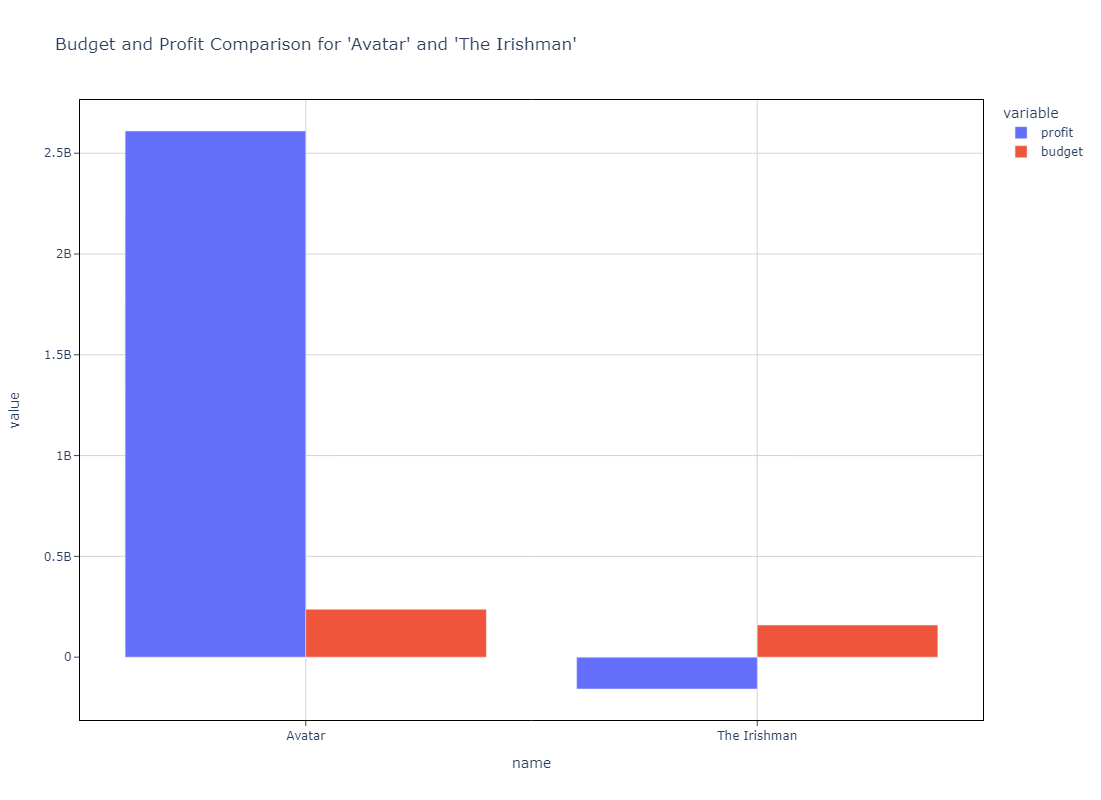

In [13]:
import plotly.express as px
fig = px.bar(data_frame = films, x = "name", y = ["profit", "budget"], barmode = "group",
             title = "Budget and Profit Comparison for 'Avatar' and 'The Irishman'", width=1000, height=800)
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black',
     showline=True,
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.show()

##### 4) What are the top 10 most popular movies?

In [14]:
pop = df[["name", "score"]].sort_values(by = "score", ascending = False)["name"].tolist()[:10]
pop

['The Shawshank Redemption',
 'The Dark Knight',
 'Pulp Fiction',
 'The Lord of the Rings: The Return of the King',
 "Schindler's List",
 'Inception',
 'Forrest Gump',
 'Fight Club',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Lord of the Rings: The Two Towers']

##### 5) What actors have the highest number of appearances?

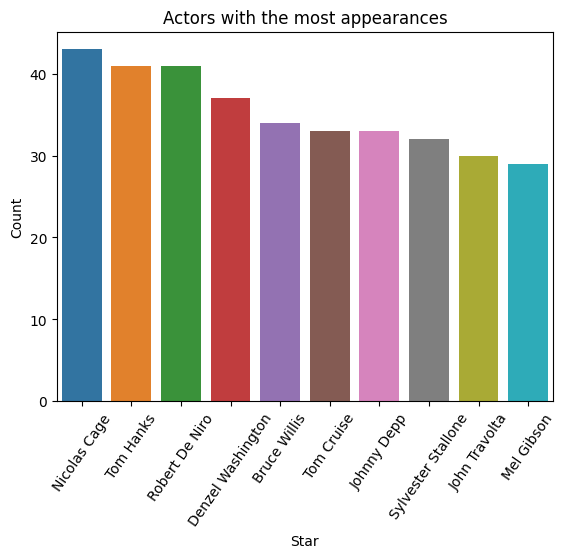

In [15]:
star = df["star"].value_counts()[:10]
sns.barplot(data = df, x = star.index, y = star)
plt.xticks(rotation = 55)
plt.ylabel("Count")
plt.xlabel("Star")
plt.title("Actors with the most appearances")
plt.show()

##### 6) What directors have the highest number of productions?

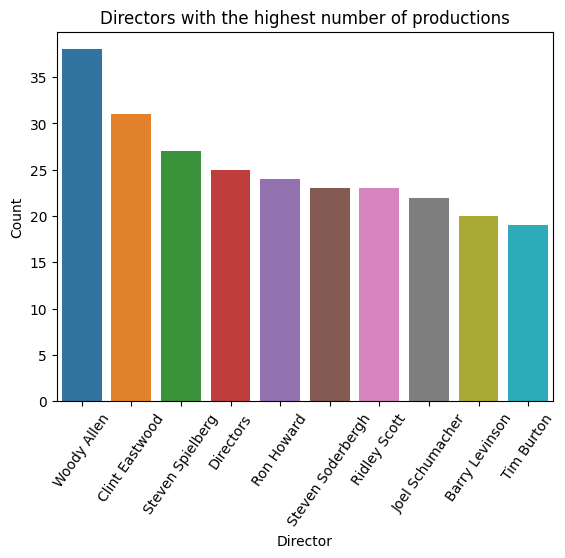

In [35]:
director = df["director"].value_counts()[:10]
sns.barplot(data = df, x = director.index, y = director)
plt.xticks(rotation = 55)
plt.ylabel("Count")
plt.xlabel("Director")
plt.title("Directors with the highest number of productions")
plt.show()

##### 7) How have user preferences changed over the years?

In [17]:
g1 = ['Comedy', 'Action', 'Drama', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Romance', 'Sci-Fi', 'Western', 'Music', 'Sport', 'Musical', 'Fantasy', 'Mystery', 'Thriller', 'Family']

In [18]:
df["genre"].value_counts()

genre
Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Adventure     419
Animation     331
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Music           1
Sport           1
Musical         1
Name: count, dtype: int64

In [19]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
dfs = {}
for i in g1:
    dfs[i] = df.query(f"genre == '{i}'")

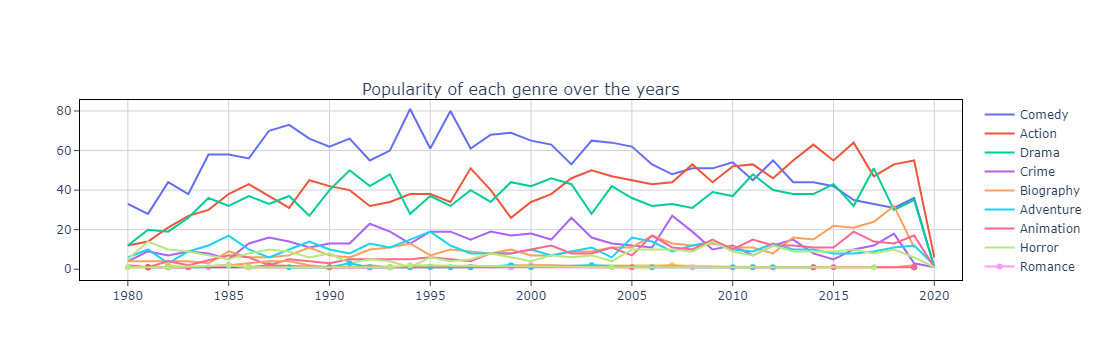

In [20]:
fig = make_subplots(subplot_titles = ["Popularity of each genre over the years"])
for i in dfs:
    fig.add_trace(go.Scatter(x=dfs[i]["year"].unique(), y=dfs[i]["year"].value_counts().sort_index(), name = i))
fig.update_layout(plot_bgcolor='white')
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black',
     showline=True,
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig   

##### 8) How has runtime changed over the years?

Text(0.5, 0, 'Year')

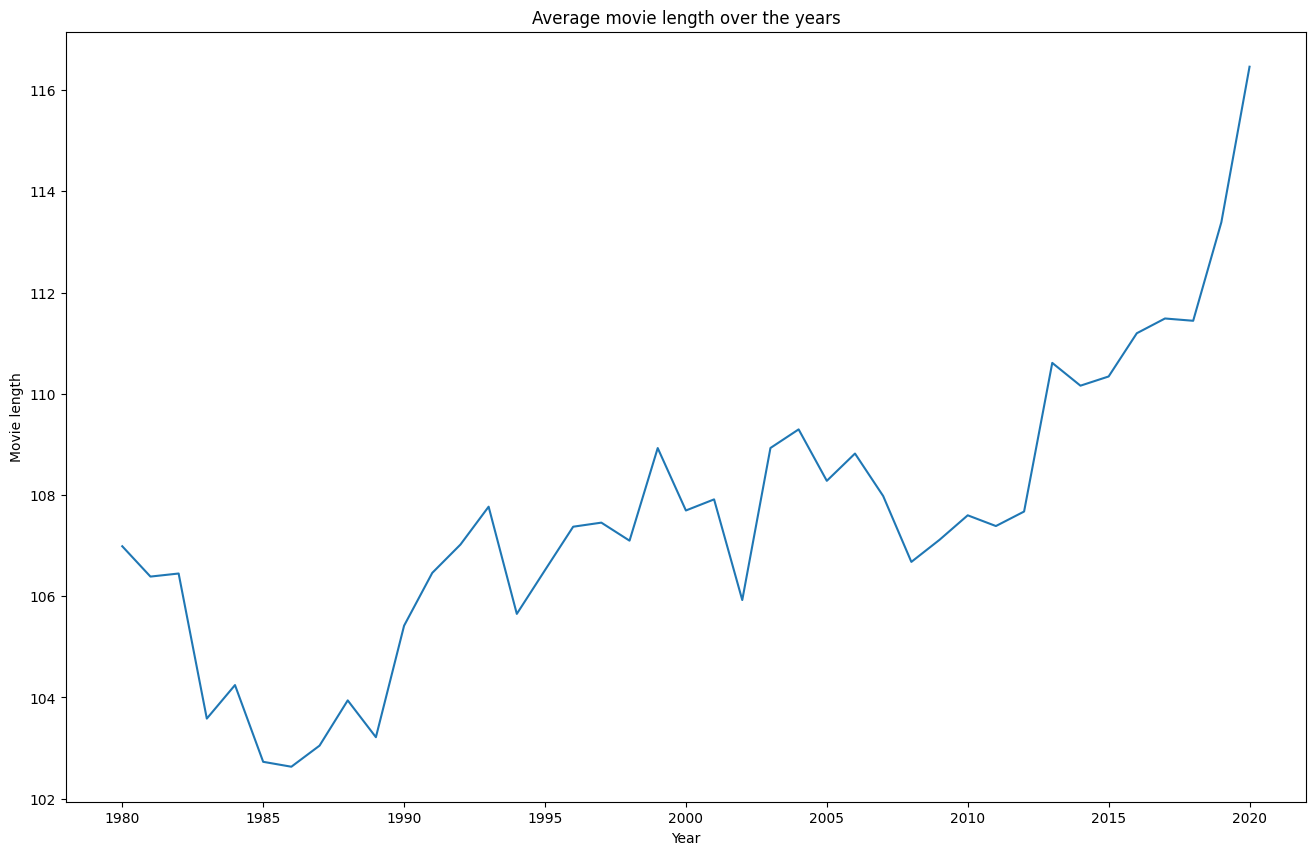

In [21]:
plt.figure(figsize = (16, 10))
sp = dict()
for i in df["year"].unique():
    data = df.loc[df["year"] == i]["runtime"].mean()
    sp.update({i: data})
sns.lineplot(data = sp)
plt.title("Average movie length over the years")
plt.ylabel("Movie length")
plt.xlabel("Year")

##### 9) What is the shortest movie? What is the longest movie? How long do they last?

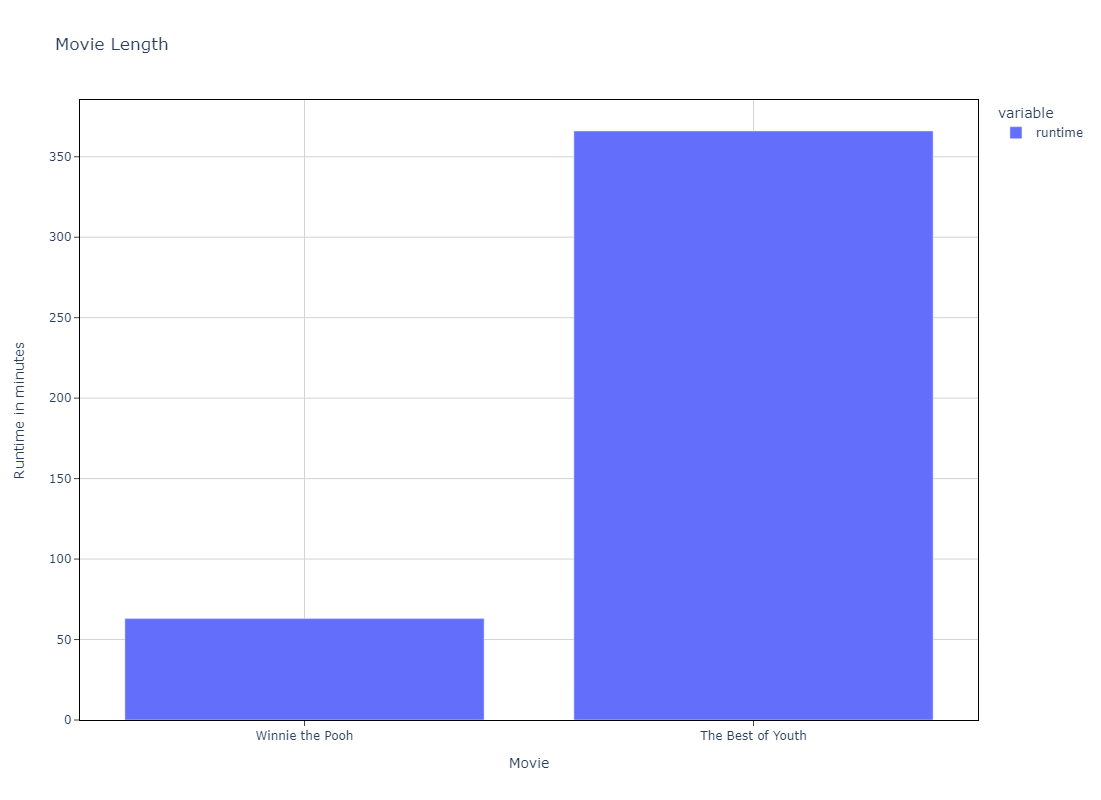

In [25]:
len = pd.concat([df.loc[df["runtime"] == df["runtime"].min()], df.loc[df["runtime"] == df["runtime"].max()]])
fig1 = px.bar(data_frame = len, x = "name", y = ["runtime"],
             title = "Movie Length", width=1000, height=800)
fig1.update_layout(plot_bgcolor='white', xaxis={"title": "Movie"}, yaxis = {"title": "Runtime in minutes"})
fig1.update_xaxes(
    mirror=True,
    ticks='outside',
    linecolor='black',
     showline=True,
    gridcolor='lightgrey'
)
fig1.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig1.show()

##### 10) What are the top ten companies with the highest number of releases?

In [26]:
def xyset(fig):
    fig.update_layout(plot_bgcolor='white')
    fig.update_xaxes(
        mirror=True,
        ticks='outside',
        linecolor='black',
         showline=True,
        gridcolor='lightgrey'
    )
    fig2.update_yaxes(
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'
    )

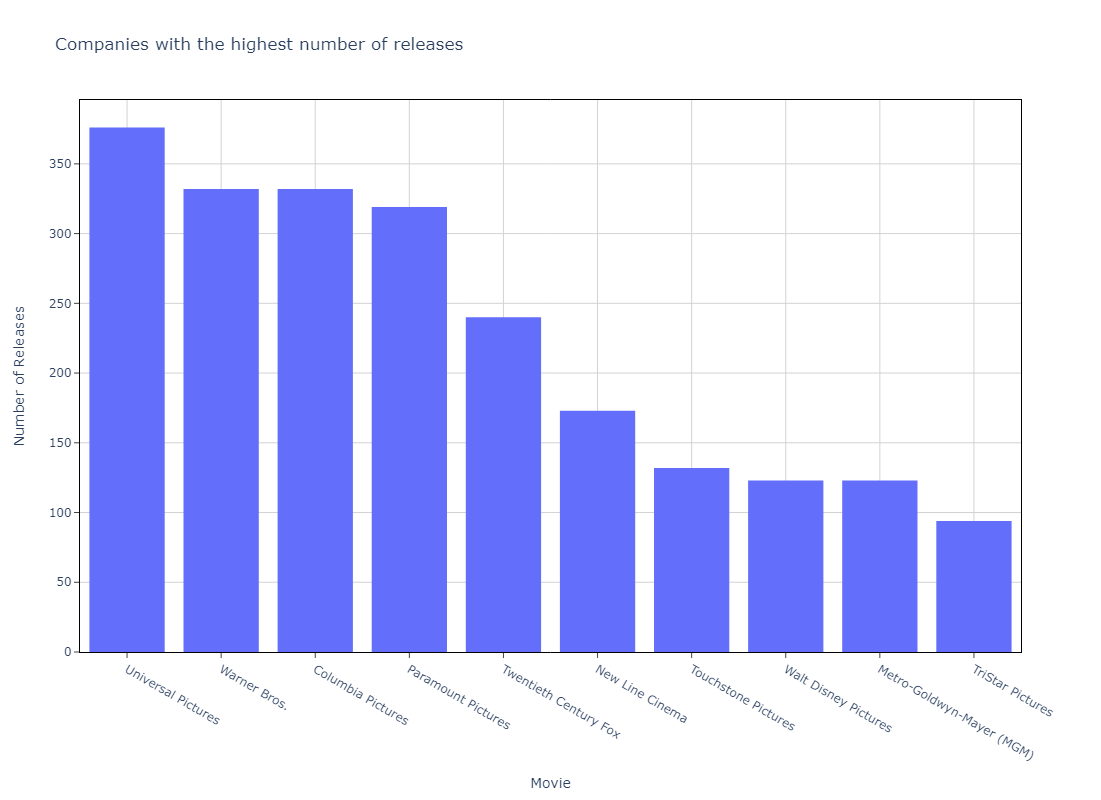

In [29]:
title = df["company"].value_counts().index[:10]
val = df["company"].value_counts()[:10]
fig2 = px.histogram(x = title, y = val, width = 800, height = 800, title = "Companies with the highest number of releases")
fig2.update_layout(xaxis={"title": "Movie"}, yaxis={"title":"Number of Releases"})
xyset(fig2)
fig2

Thus, the following assumptions can be made:
1) There are correlations between gross revenue and budget, gross revenue and reviews, budget and reviews, score and runtime,
score and reviews. This means that a change in budget or runtime could cause changes in revenue and score.
2) Over the years, genre preferences have changed. Action films, dramas and biographies seem to be more popular than before.
3) During the analysed period the average runtime value has increased.
4) Such companies as Universal Pictures, Warner Bros., Columbia Pictures, etc. are market leaders in the film industry. New players may find it hard to get in.
5) Such actors as Nicolas Cage, Tom Hanks, Robert de Niro, etc. have appeared in films more often than others. Also, such directors as Woody Allen, Clint Eastwood, Steven Spielberg, etc. have made the most productions. 